# Heart Disease | Proyecto 2 | Inteligencia Artificial | Universidad del Valle

Carlos Esteban Murillo- 1526857<br>
Jem PoolSuarez - 1630536<br>
Esneider Manzano - 1628373<br>

<img src="heart-attack.jpg" width="300px"> 

# Importando las librerías

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

import math

# Cargando los datos

In [3]:
trainx = pd.read_csv("./heart.csv")

Se presenta un resumen de la información contenida en el dataset la cual aporta cierto conocimiento sobre los datos a trabajar

In [4]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        Resultados electrocardiográficos en reposo <br>
        0: normal<br>
        1: con anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST> 0.05 mV)<br>
        2: que muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Target (disease):</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

<h3>Datos completos</h3>

In [6]:
print("NaNs Existentes:")
print(trainx.isna().any().any())
print("------------------")
print("Nulls Existentes:")
print(trainx.isnull().any().any())

NaNs Existentes:
False
------------------
Nulls Existentes:
False


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

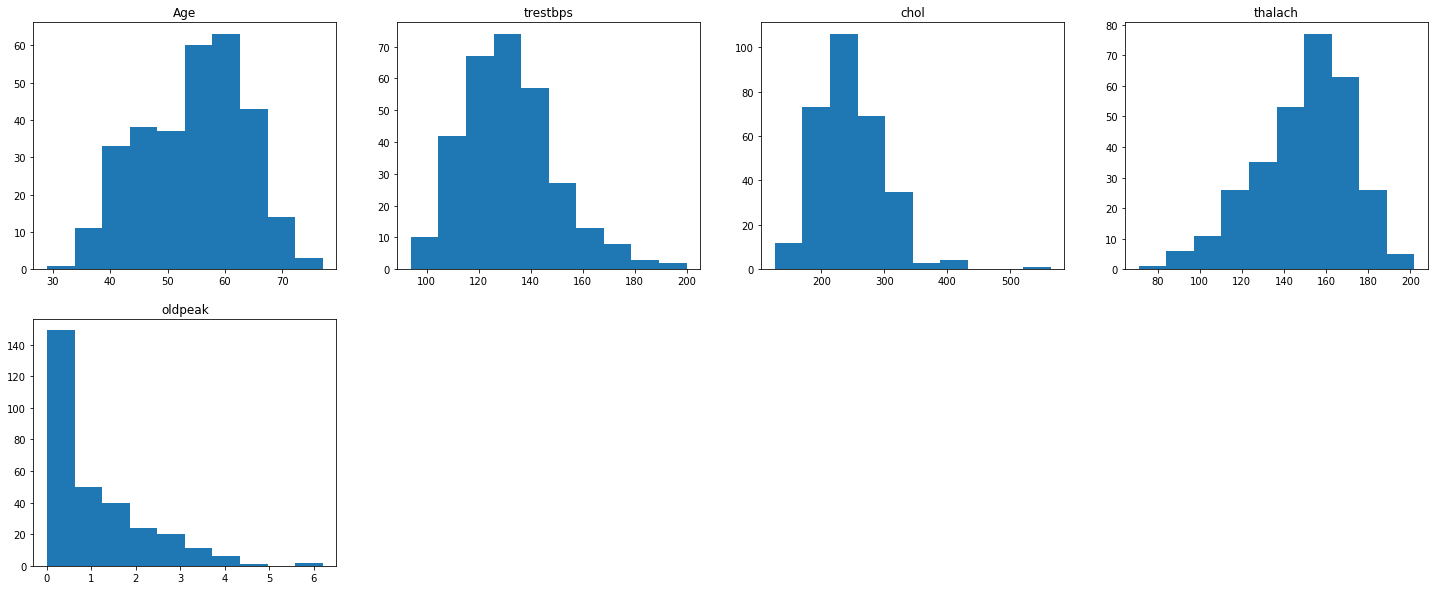

In [7]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Pasteles</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5, 1.0, 'Target')

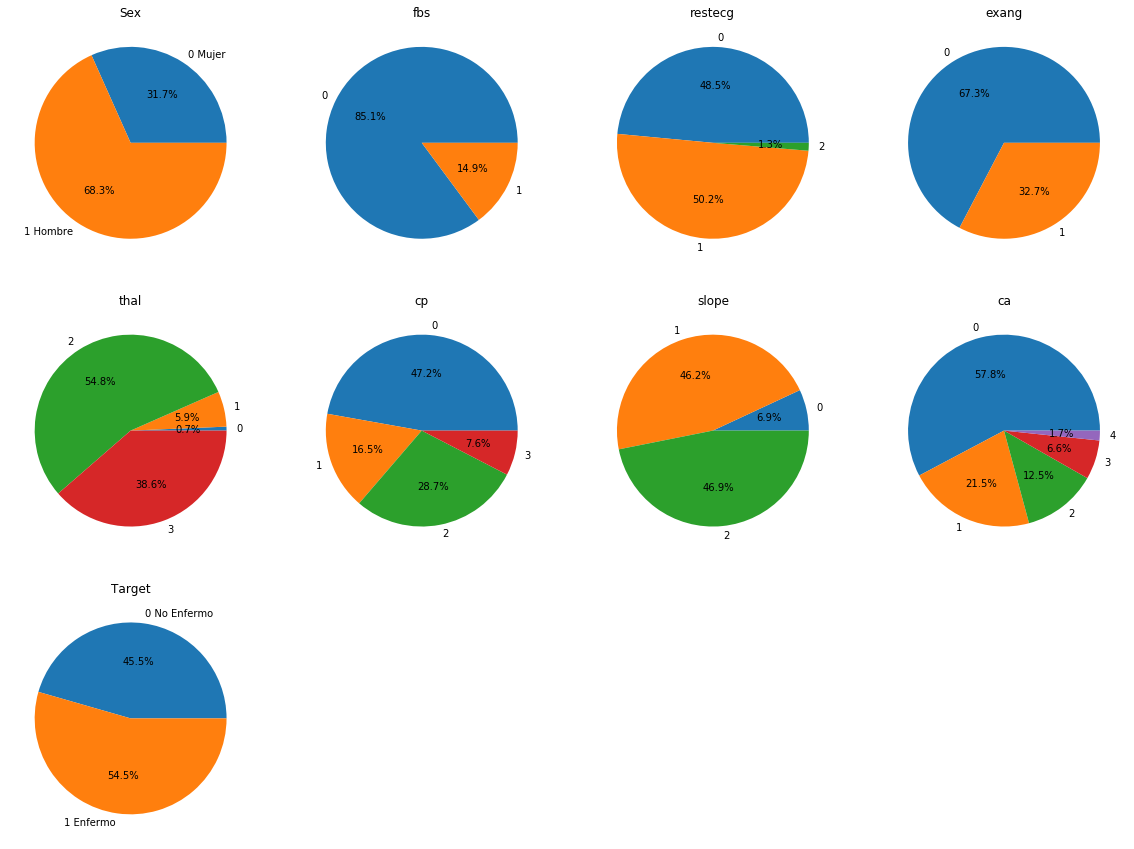

In [8]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0","1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Target')



# División del conjunto de datos
<h2>80% para entrenamiento y 20% para pruebas</h2>


In [9]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar y probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, random_state = 40)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(242, 13) (242,)
(61, 13) (61,)


Número de tuplas para entrenamiento : <b>242</b> <br>
Número de tuplas para pruebas: <b>61</b>

In [27]:
#Funcion auxiliar para la generacion de la grafica de la matriz de confusion 
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('OrRd')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Prediccion')
    plt.xlabel('Real\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Árbol de decisión

El árbol de decisión se basa en encontrar una medida de selección de los atributos, es una heurística para seleccionar el criterio de división que divide los datos de la mejor manera posible. Este proceso genera un rango para cada atributo al explicar el conjunto de datos dado. El atributo de mejor puntaje se seleccionará como un atributo de división.

Se han establecido para este caso dos implementaciones del modelo de arbol, uno en el cual se deben establecer valores para la profundidad máxima del árbol, el número mínimo de muestras para dividir un nodo y un número que represente la semilla inicial para generar números aleatorios.

Para el segundo se establece el criterio a entropia y se coloca una profundidad maxima (con este trabajeremos el resto del notebook).

In [33]:
model11 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_split = 5, random_state = 40)

model11 = model11.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model11.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model11.score(testX, testY)))

Train: 0.9545454545454546
Test: 0.7377049180327869


In [26]:
#model1 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_split = 5, random_state = 40)
model1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

Train: 0.8677685950413223
Test: 0.8688524590163934


Se puede apreciar que los resultados para el conjunto de entrenamiento y de prueba no son muy cercanos, esto se debe a que el modelo de clasificación del árbol de decisión es un modelo poco estable y que en ciertos casos no garantiza resultados del todo confiables. Sin embargo en base a la configuración establecida anteriormente se llega a un rendimiento aceptable por parte del conjunto de prueba, entre un 72% y 78%.

<h2>Matriz de confusión</h2>

<p>Correcta interpretación de la matriz de confusión segun Sklearn.
<b><a src="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</a></b></p>
<img src="confusion.png" width="1500px"> 

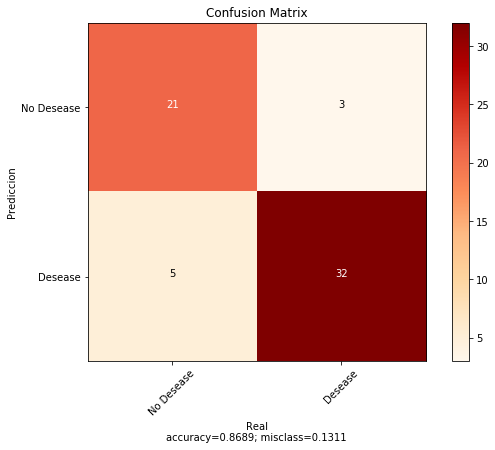

In [28]:
plot_confusion_matrix(cm = confusion_matrix(model1.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['No Desease', 'Desease'],
                      title        = "Confusion Matrix")

# Gráfica de Importancias y Árbol de decisión


[0.14324626 0.30143084 0.         0.03589137 0.05943467 0.04203262
 0.04114822 0.         0.02589366 0.03522548 0.15107854 0.
 0.16461833] 0.8679867986798679


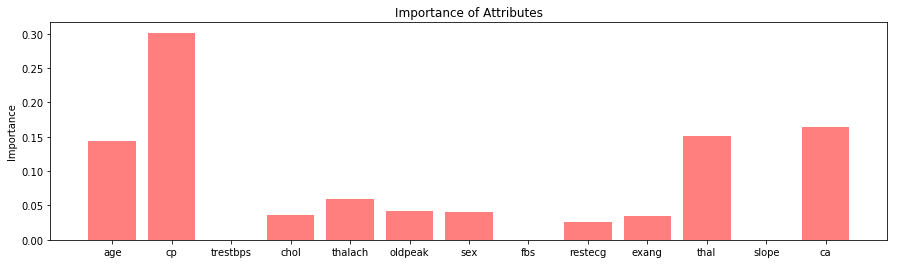

In [29]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

En este gráfico se puede apreciar la importancia que tiene cada atributo sobre el conjunto de datos. Durante de construcción del árbol se realizaron bastantes ejecuciones para determinar cuál era el atributo que representa al nodo padre, fue claro que el atributo que más veces aparece con una importancia mayor a la del resto era <i><b>Chest Pain</b></i>.

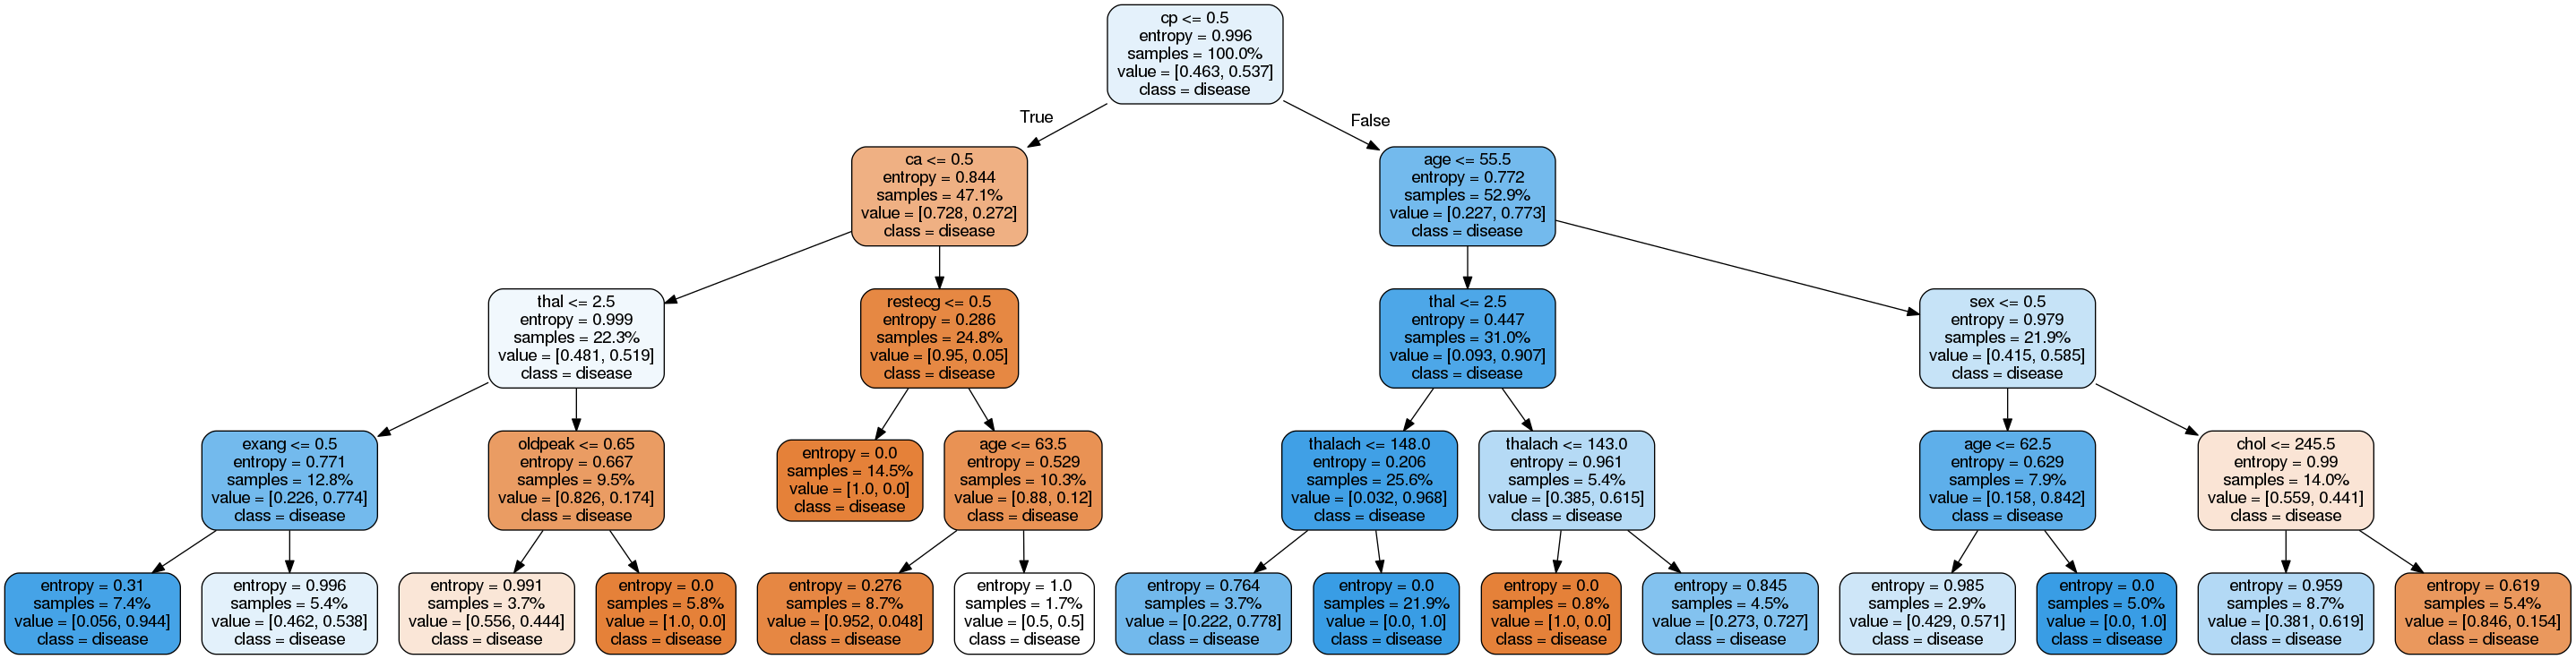

In [17]:
y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h2>Interpretación</h2>

El árbol de decisión evalúa cada atributo o característica de los datos dados, de tal manera que cumplan con cierto valor de importancia sobre el target final. Aquí también entra en juego el valor del Gini, un valor que determina el grado de "pureza" del atributo en base al número de muestras que se están evaluando en el. Es por esto que si su valor es cero, quiere decir que el nodo presenta sólo información de dicho atributo, de lo contrario se presentan registros de otros atributos que influyen sobre el nodo actual.

Es claro que se puede representar los resultados de una manera muy sencilla y fácil de interpretar, debido a que se puede generar automáticamente una gráfica que describa el proceso de selección de los atributos que influyen más en una prediccion. Esto hace que el modelo de arboles de decisión sea un modelo muy práctico a la hora de entender cómo se ejecutan las condiciones y se generan resultados.

# Naive Bayes

El modelo de bayes ingenuo presenta una estrategia basada en el teorema de bayes. Se puede apreciar que la clasificacion con Naive Bayes es directa y no requiere ajustar parametros para obtener mejores resultados.

In [18]:
# Naive Bayes
gnb = GaussianNB()

# Entrenamiento
model2 = gnb.fit(trainX, trainY)

print("Train: " + str(model2.score(trainX, trainY)))
print("Test: " + str(model2.score(testX, testY)))

Train: 0.8429752066115702
Test: 0.8688524590163934


<h2>Matriz de confusión</h2>

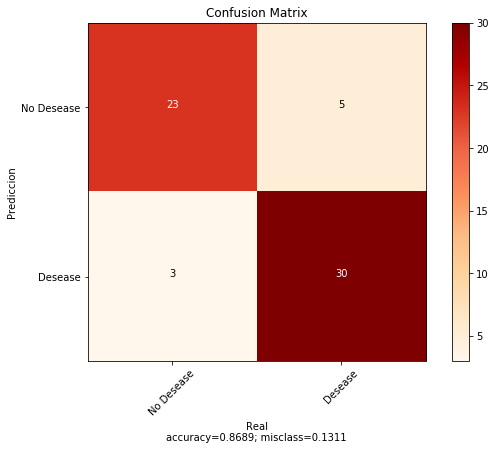

In [30]:
plot_confusion_matrix(cm = confusion_matrix(model2.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['No Desease', 'Desease'],
                      title        = "Confusion Matrix")

<h2>Interpretación</h2>

El modelo se basa en establecer la probabilidad de un suceso, en este caso determinar si una persona está enferma o no, basado en las condiciones del resto de atributos que inciden sobre esta condición. Este modelo resulta conveniente ya que hace uso de la misma influencia de los datos que tienen sobre ellos mismos para determinar las probabilidades de acierto y desacierto para enfermedades del corazón.

# Red Neuronal

In [21]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=4000,
                     hidden_layer_sizes = (4, 4, 4, 4), random_state=40, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("Entrenamiento")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nPruebas")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

Entrenamiento
0.9214876033057852
[[102   9]
 [ 10 121]]

Pruebas
0.8852459016393442
[[21  2]
 [ 5 33]]


La configuración del modelo con redes neuronales, muestra una muy buena exactitud entre el rendimiento del conjunto de entrenamiento y de pruebas, la configuración que se plantea inicialmente consiste en cuatro capas invisibles con cuatro neuronas cada una haciendo uso de la función de activación <b>relu</b>, y como función de optimización <b>lbfgs</b> que hace parte de la familia de los métodos quasi-Newton.

<img src="relu.png" width="300px"> 

<h2>Matriz de confusión</h2>

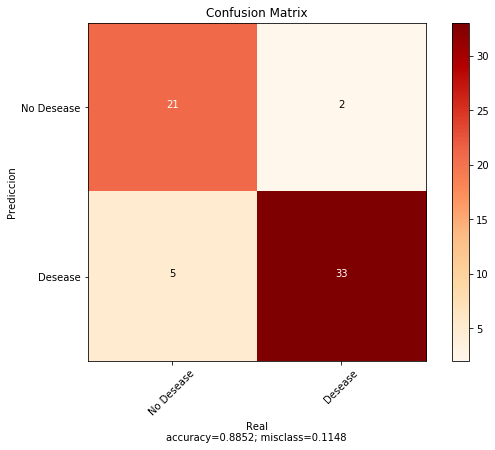

In [31]:
plot_confusion_matrix(cm = confusion_matrix(model3.predict(testXX), testY), 
                      normalize    = False,
                      target_names = ['No Desease', 'Desease'],
                      title        = "Confusion Matrix")

<h2>Interpretación</h2>

La interpretación de un modelo de redes neuronales se considera bastante complejo, por una parte dispone de muchos atributos que deben cambiarse y que mejoran y/o empeoran los resultados; y por otra no ofrece una representación fácil de interpretar del proceso que se lleva a cabo internamente para la obtención de resultados.

# Comparación de los modelos 

<h2>Precisión y Estabilidad</h2>

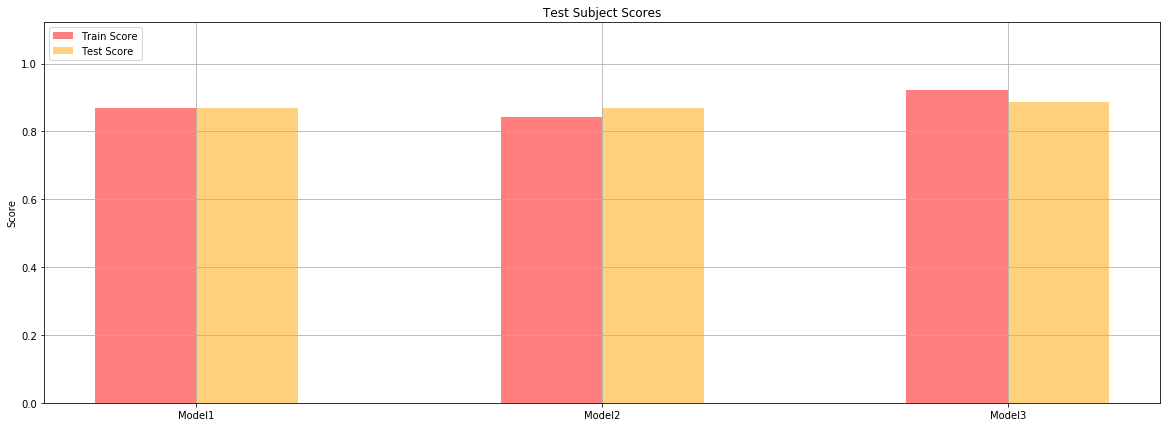

In [23]:
raw_data = {'Modelo': ['Model1', 'Model2', 'Model3'],
        'Train Score': [model1.score(trainX, trainY), model2.score(trainX, trainY), model3.score(trainXX, trainY)],
        'Test Score': [model1.score(testX, testY), model2.score(testX, testY), model3.score(testXX, testY)]}

df = pd.DataFrame(raw_data, columns = ['Modelo', 'Train Score', 'Test Score'])
# Setting the positions and width for the bars
pos = list(range(len(df['Train Score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,7))

# Create a bar with pre_score data,

plt.bar(pos, 
        df['Train Score'], 
        width, 
        alpha=0.5, 
        color='red', 
        label=df['Modelo'][0]) 

plt.bar([p + width for p in pos], 
        df['Test Score'],
        width, 
        alpha=0.5, 
        color='orange', 
        label=df['Modelo'][1]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Modelo'])

# Setting the x-axis and y-axis limits
plt.ylim([0, max(df['Train Score'] + 0.2)] )

# Adding the legend and showing the plot
plt.legend(['Train Score', 'Test Score'], loc='upper left')
plt.grid()
plt.show()

Al comparar los scores de entrenamiento y pruebas de cada uno de los modelos podemos observar que todos superan el 60%, lo que permite concluir que para este conjunto de datos se han obtenido resultados aceptables.

El nivel de precisión de los modelos se puede ver como el número de aciertos sobre el número total de muestras del target en particular (enfermo | no enfermo). A continuación se presentan los resultados:

In [32]:
mArbol = confusion_matrix(model1.predict(testX), testY)
mBayes = confusion_matrix(model2.predict(testX), testY)
mNet = confusion_matrix(model3.predict(testXX), testY)

enfArbol = mArbol[1][1] / float(mArbol[1][1] + mArbol[0][1]);
NenfArbol = mArbol[0][0] / float(mArbol[0][0] + mArbol[1][0]);

enfBayes = mBayes[1][1] / float(mBayes[1][1] + mBayes[0][1]);
NenfBayes = mBayes[0][0] / float(mBayes[0][0] + mBayes[1][0]);

enfNet =  mNet[1][1] / float(mNet[1][1] + mNet[0][1]);
NenfNet = mNet[0][0] / float(mNet[0][0] + mNet[1][0]);

print("Porcentaje de acierto del arbol para enfermos:", enfArbol)
print("Porcentaje de acierto del arbol para no enfermos:", NenfArbol)

print("Porcentaje de acierto de bayes para enfermos:", enfBayes)
print("Porcentaje de acierto de bayes para no enfermos:", NenfBayes)

print("Porcentaje de acierto de la red para enfermos:", enfNet)
print("Porcentaje de acierto de la red para no enfermos:", NenfNet)

Porcentaje de acierto del arbol para enfermos: 0.9142857142857143
Porcentaje de acierto del arbol para no enfermos: 0.8076923076923077
Porcentaje de acierto de bayes para enfermos: 0.8571428571428571
Porcentaje de acierto de bayes para no enfermos: 0.8846153846153846
Porcentaje de acierto de la red para enfermos: 0.9428571428571428
Porcentaje de acierto de la red para no enfermos: 0.8076923076923077


Se muestra que el modelo que mejor acierto tiene para enfermos es la red neuronal y para los no enfermos el modelo de bayes.

El primer modelo de árboles de decisión presenta el mayor rendimiento en el entrenamiento y el menor en las pruebas en comparación al resto de modelos, por lo que este se presenta como el más inestable de todos. Los modelos de Naive Bayes y redes neuronales por otra parte se mantienen muy similares entre los resultados de entrenamiento y pruebas, mostrando un comportamiento más estable.

In [25]:
#Diferencia entre los scores de entrenamiento y pruebas de cada modelo

print("Arbol: ", abs(model1.score(trainX, trainY) - model1.score(testX, testY)))
print("Bayes: ", abs(model2.score(trainX, trainY) - model2.score(testX, testY)))
print("Red: ", abs(model3.score(trainXX, trainY) - model3.score(testXX, testY)))

Arbol:  0.0010838639750710977
Bayes:  0.025877252404823192
Red:  0.03624170166644092


<h2>Interpretabilidad</h2>

A la hora de interpretar resultados, el modelo más práctico es el de árbol de decisión debido a que se puede representar gráficamente y entender la toma de decisiones que se siguen. Por otro lado el modelo de Bayes y redes neuronales no ofrecen una representación muy clara del proceso que llevan a cabo que favorezca  su descripción.

# Conclusiones

En su opinión, ¿cuál de los 3 métodos usaría para resolver el problema de predecir enfermedades del corazón y por qué?

Usaríamos el método de Arboles de decisión, porque los resultados nos llevan a tomar esta decisión.

Aunque inicialmente supusimos que el mejor resultado lo obtendríamos usando el método de redes neuronales, dadas las características de este, tales como robustez al ruido y a los fallos, y a sus aplicaciones en reconocimiento, predicción y asociación, consideramos que podría darnos los mejores resultados. Sin embargo, con base en los resultados que obtuvimos, este método no es el mejor para realizar predicciones en cuanto a enfermedades del corazón con el conjunto de datos utilizado. Los resultados fueron: Train: 0.92 y Test: 0.88.

Es importante resaltar que conocemos muy poco sobre la forma correcta de ajustar los diferentes parámetros de entrada para este método, lo cual hace muy probable que hayamos utilizado mal esta potente herramienta.

La que no considerábamos la mejor opción, nos arrojó los mejores resultados en cuanto a la relación entrenamiento-predicción.
En un principio fue el peor de los tres resultados, este lo obtuvimos con la configuración de la funcion ‘DecisionTreeClassifier’ en el valor por defecto ‘Gini’, del parámetro criterio, este parámetro recibe el nombre de la función que mide la calidad de la partición; el resultado que obtuvimos fue: Train: 0.95 y Test: 0.73.
Posteriormente ajustamos el parámetro criterio a "entropía" y obtuvimos los resultados: Train: 0.86 y Test: 0.86. Creemos que esto se debe a que el índice de Gini considera una división binaria para cada atributo y cinco de los atributos de entrada corresponden a variables numéricas, que probablemente tienen un aporte importante en la predicción del modelo y al ser tratadas con prevalencia binaria se pierde precisión.

Finalmente supusimos que el modelo de Naive Bayes no sería el mejor, pues, aunque proporciona una manera fácil de construir modelos dada su simplicidad, parte de la suposición de que las diferentes características en el conjunto de datos son independientes y dada la naturaleza del problema y de los datos de entrada, nos pareció natural suponer que los síntomas y otras características de una enfermedad generalmente están asociados. Los resultados fueron: Train: 0.84 y Test: 0.86.
